In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os

from disp import get_line, set_color, set_plot
from my_torch import fit_song_fmtn
from run_train import TrainArgs, train

cc = np.concatenate

# DATA_DIR = os.path.join(DATA_DIR, 'scrambled')  # use scrambled data

## Classification test

In [2]:
DATA_DIR = 'ultralight/clf'
# DATA_DIR = os.path.join(DATA_DIR, 'scrambled')  # use scrambled data (control)

args = TrainArgs(
    C_init='trunc_standard_normal', batchnorm=True, bidirectional=True,
    epoch_save_dir="epochs_clf", save_training=1, 
    blocks=16, bsz=32, d_model=8, clear_cache=True, data_dir=DATA_DIR,
    problem_type='clf_token', dt_global=True, epochs=10, jax_seed=5464358, lr_factor=2, n_layers=1,
    opt_config='standard', p_dropout=0.0, ssm_lr_base=0.001, ssm_size_base=64,
    warmup_end=0, weight_decay=0.05, cosine_anneal=False)

train(args)

Deleting saved epoch files from epochs_clf...
[*] Setting Randomness...
[*] Generating Token Sequence Classification Dataset


/home/rp21/.conda/envs/s5-gpu/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Clearing cache...


Saving the dataset (1/1 shards): 100%|██████████| 200/200 [00:00<00:00, 69287.26 examples/s] 


Vcab size: 6
[*] Starting S5 clf_token training on `ultralight/clf` =>> Initializing...
Lambda.shape=(32,)
V.shape=(64, 32)
Vinv.shape=(32, 64)
configuring standard optimization setup
[*] Trainable Parameters: 1802


/scratch/gpfs/rp21/s5_test/S5-regression/s5/train_helpers.py:244: FutureWarning: jax.tree_leaves is deprecated, and will be removed in a future release. Use jax.tree_util.tree_leaves instead.
  print(f"[*] Trainable Parameters: {sum(jax.tree_leaves(param_sizes))}")


[*] Starting Training Epoch 1...
using constant lr for epoch 1


100%|██████████| 25/25 [00:08<00:00,  2.90it/s]


[*] Running Epoch 1 Validation...


100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


[*] Running Epoch 1 Test...


100%|██████████| 7/7 [00:00<00:00, 406.38it/s]



=>> Epoch 1 Metrics ===
	Train Loss: 4.96854 -- Val Loss: 0.54022 --Test Loss: 0.54022 -- Val Accuracy: 0.9600 -- Test Accuracy: 0.9600
	Best Val Loss: 0.54022 -- Best Val Accuracy: 0.9600 at Epoch 1
	Best Test Loss: 0.54022 -- Best Test Accuracy: 0.9600 at Epoch 1

[*] Starting Training Epoch 2...
using constant lr for epoch 2


100%|██████████| 25/25 [00:00<00:00, 52.67it/s]


[*] Running Epoch 2 Validation...


100%|██████████| 7/7 [00:00<00:00, 435.42it/s]


[*] Running Epoch 2 Test...


100%|██████████| 7/7 [00:00<00:00, 442.20it/s]



=>> Epoch 2 Metrics ===
	Train Loss: 0.40668 -- Val Loss: 0.57660 --Test Loss: 0.57660 -- Val Accuracy: 0.7250 -- Test Accuracy: 0.7250
	Best Val Loss: 0.54022 -- Best Val Accuracy: 0.9600 at Epoch 1
	Best Test Loss: 0.54022 -- Best Test Accuracy: 0.9600 at Epoch 1

[*] Starting Training Epoch 3...
using constant lr for epoch 3


100%|██████████| 25/25 [00:00<00:00, 52.63it/s]


[*] Running Epoch 3 Validation...


100%|██████████| 7/7 [00:00<00:00, 441.29it/s]


[*] Running Epoch 3 Test...


100%|██████████| 7/7 [00:00<00:00, 447.92it/s]



=>> Epoch 3 Metrics ===
	Train Loss: 0.14326 -- Val Loss: 0.55283 --Test Loss: 0.55283 -- Val Accuracy: 0.8700 -- Test Accuracy: 0.8700
	Best Val Loss: 0.54022 -- Best Val Accuracy: 0.9600 at Epoch 1
	Best Test Loss: 0.54022 -- Best Test Accuracy: 0.9600 at Epoch 1

[*] Starting Training Epoch 4...
using constant lr for epoch 4


100%|██████████| 25/25 [00:00<00:00, 52.57it/s]


[*] Running Epoch 4 Validation...


100%|██████████| 7/7 [00:00<00:00, 420.83it/s]


[*] Running Epoch 4 Test...


100%|██████████| 7/7 [00:00<00:00, 445.63it/s]



=>> Epoch 4 Metrics ===
	Train Loss: 0.11247 -- Val Loss: 0.45359 --Test Loss: 0.45359 -- Val Accuracy: 0.8700 -- Test Accuracy: 0.8700
	Best Val Loss: 0.45359 -- Best Val Accuracy: 0.9600 at Epoch 1
	Best Test Loss: 0.54022 -- Best Test Accuracy: 0.9600 at Epoch 1

[*] Starting Training Epoch 5...
using constant lr for epoch 5


100%|██████████| 25/25 [00:00<00:00, 52.73it/s]


[*] Running Epoch 5 Validation...


100%|██████████| 7/7 [00:00<00:00, 442.82it/s]


[*] Running Epoch 5 Test...


100%|██████████| 7/7 [00:00<00:00, 443.86it/s]



=>> Epoch 5 Metrics ===
	Train Loss: 0.09942 -- Val Loss: 0.25842 --Test Loss: 0.25842 -- Val Accuracy: 0.8650 -- Test Accuracy: 0.8650
	Best Val Loss: 0.25842 -- Best Val Accuracy: 0.9600 at Epoch 1
	Best Test Loss: 0.54022 -- Best Test Accuracy: 0.9600 at Epoch 1

[*] Starting Training Epoch 6...
using constant lr for epoch 6


100%|██████████| 25/25 [00:00<00:00, 52.75it/s]


[*] Running Epoch 6 Validation...


100%|██████████| 7/7 [00:00<00:00, 437.73it/s]


[*] Running Epoch 6 Test...


100%|██████████| 7/7 [00:00<00:00, 445.97it/s]



=>> Epoch 6 Metrics ===
	Train Loss: 0.08883 -- Val Loss: 0.13413 --Test Loss: 0.13413 -- Val Accuracy: 0.9450 -- Test Accuracy: 0.9450
	Best Val Loss: 0.13413 -- Best Val Accuracy: 0.9600 at Epoch 1
	Best Test Loss: 0.54022 -- Best Test Accuracy: 0.9600 at Epoch 1

[*] Starting Training Epoch 7...
using constant lr for epoch 7


100%|██████████| 25/25 [00:00<00:00, 52.71it/s]


[*] Running Epoch 7 Validation...


100%|██████████| 7/7 [00:00<00:00, 437.74it/s]


[*] Running Epoch 7 Test...


100%|██████████| 7/7 [00:00<00:00, 446.65it/s]



=>> Epoch 7 Metrics ===
	Train Loss: 0.07911 -- Val Loss: 0.07568 --Test Loss: 0.07568 -- Val Accuracy: 1.0000 -- Test Accuracy: 1.0000
	Best Val Loss: 0.07568 -- Best Val Accuracy: 1.0000 at Epoch 7
	Best Test Loss: 0.07568 -- Best Test Accuracy: 1.0000 at Epoch 7

[*] Starting Training Epoch 8...
using constant lr for epoch 8


100%|██████████| 25/25 [00:00<00:00, 52.81it/s]


[*] Running Epoch 8 Validation...


100%|██████████| 7/7 [00:00<00:00, 437.44it/s]


[*] Running Epoch 8 Test...


100%|██████████| 7/7 [00:00<00:00, 445.69it/s]



=>> Epoch 8 Metrics ===
	Train Loss: 0.08539 -- Val Loss: 0.06687 --Test Loss: 0.06687 -- Val Accuracy: 0.9800 -- Test Accuracy: 0.9800
	Best Val Loss: 0.06687 -- Best Val Accuracy: 1.0000 at Epoch 7
	Best Test Loss: 0.07568 -- Best Test Accuracy: 1.0000 at Epoch 7

[*] Starting Training Epoch 9...
using constant lr for epoch 9


100%|██████████| 25/25 [00:00<00:00, 52.78it/s]


[*] Running Epoch 9 Validation...


100%|██████████| 7/7 [00:00<00:00, 444.50it/s]


[*] Running Epoch 9 Test...


100%|██████████| 7/7 [00:00<00:00, 445.94it/s]



=>> Epoch 9 Metrics ===
	Train Loss: 0.07362 -- Val Loss: 0.05901 --Test Loss: 0.05901 -- Val Accuracy: 1.0000 -- Test Accuracy: 1.0000
	Best Val Loss: 0.05901 -- Best Val Accuracy: 1.0000 at Epoch 7
	Best Test Loss: 0.07568 -- Best Test Accuracy: 1.0000 at Epoch 7

[*] Starting Training Epoch 10...
using constant lr for epoch 10


100%|██████████| 25/25 [00:00<00:00, 52.75it/s]


[*] Running Epoch 10 Validation...


100%|██████████| 7/7 [00:00<00:00, 439.65it/s]


[*] Running Epoch 10 Test...


100%|██████████| 7/7 [00:00<00:00, 445.96it/s]



=>> Epoch 10 Metrics ===
	Train Loss: 0.06334 -- Val Loss: 0.04961 --Test Loss: 0.04961 -- Val Accuracy: 1.0000 -- Test Accuracy: 1.0000
	Best Val Loss: 0.04961 -- Best Val Accuracy: 1.0000 at Epoch 7
	Best Test Loss: 0.07568 -- Best Test Accuracy: 1.0000 at Epoch 7



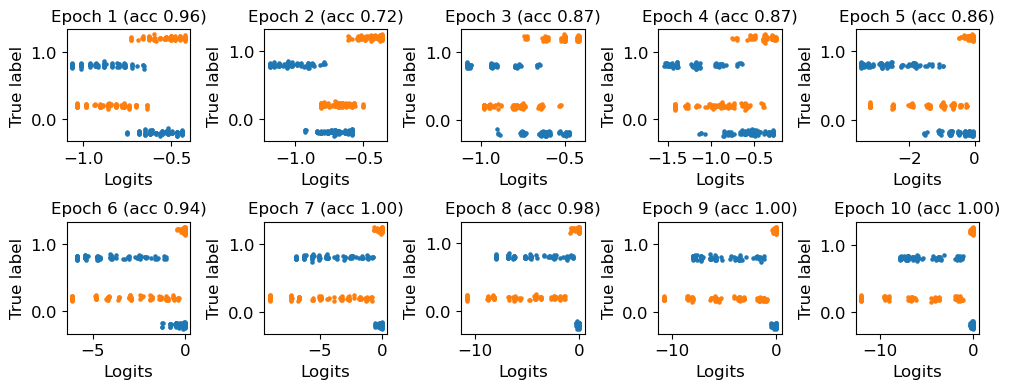

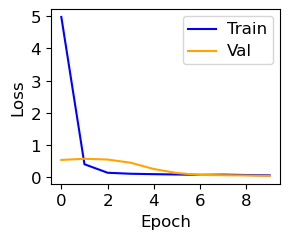

In [3]:
from disp import colors

# load results
fig, axs = plt.subplots(2, 5, figsize=(10, 4), tight_layout=True)

train_losses = []
val_losses = []

for cepoch, ax in enumerate(axs.flatten()):
    data = np.load(f'epochs_clf/epoch_{cepoch}.npy', allow_pickle=True)[0]
    
    targs = data['val_targ']
    preds = data['val_pred']
    
    acc = np.mean(targs == preds.argmax(1))
    
    labels = np.sort(np.unique(targs))
    y_ticks = []
    
    for clabel_0, label_0 in enumerate(labels):
        for clabel_1, label_1 in enumerate(labels):
            logits = preds[targs==label_0, clabel_1]
            display_jitter = .02*np.random.randn(len(logits))
            ax.scatter(logits, np.zeros(len(logits)) + clabel_0 + .8*clabel_1/len(labels) + display_jitter, c=colors[clabel_1], s=5)
            
        y_ticks.append(clabel_0 + .2)
    
    set_plot(ax, y_ticks=y_ticks, y_tick_labels=labels, x_label='Logits', y_label='True label', title=f'Epoch {cepoch+1} (acc {acc:.2f})')
    
    train_losses.append(data['train_loss'])
    val_losses.append(data['val_loss'])
    
fig, ax = plt.subplots(1, 1, figsize=(3, 2.5), tight_layout=True)
ax.plot(train_losses, c='b')
ax.plot(val_losses, c='orange')
ax.legend(['Train', 'Val'])
set_plot(ax, x_label='Epoch', y_label='Loss')

# Regression test

In [4]:
DATA_DIR = 'ultralight/rgr'
# DATA_DIR = os.path.join(DATA_DIR, 'scrambled')  # use scrambled data (control)

args = TrainArgs(
    C_init='trunc_standard_normal', batchnorm=True, bidirectional=True,
    epoch_save_dir="epochs_rgr", save_training=1, 
    blocks=16, bsz=32, d_model=8, clear_cache=True, data_dir=DATA_DIR,
    problem_type='rgr_token', dt_global=True, epochs=20, jax_seed=5464358, lr_factor=2, n_layers=1,
    opt_config='standard', p_dropout=0.0, ssm_lr_base=0.001, ssm_size_base=64,
    warmup_end=0, weight_decay=0.05, cosine_anneal=False)

train(args)

Deleting saved epoch files from epochs_rgr...
[*] Setting Randomness...
[*] Generating Token Sequence Regression Dataset
Clearing cache...


Saving the dataset (1/1 shards): 100%|██████████| 200/200 [00:00<00:00, 69870.13 examples/s] 


Vocab size: 6
[*] Starting S5 rgr_token training on `ultralight/rgr` =>> Initializing...
Lambda.shape=(32,)
V.shape=(64, 32)
Vinv.shape=(32, 64)
configuring standard optimization setup
[*] Trainable Parameters: 1793
[*] Starting Training Epoch 1...
using constant lr for epoch 1


100%|██████████| 25/25 [00:08<00:00,  3.12it/s]


[*] Running Epoch 1 Validation...


100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


[*] Running Epoch 1 Test...


100%|██████████| 7/7 [00:00<00:00, 406.46it/s]



=>> Epoch 1 Metrics ===
	Train Loss: 4.05345 -- Val Loss: 0.59272 --Test Loss: 0.59272 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.59272 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 2...
using constant lr for epoch 2


100%|██████████| 25/25 [00:00<00:00, 53.11it/s]


[*] Running Epoch 2 Validation...


100%|██████████| 7/7 [00:00<00:00, 412.56it/s]


[*] Running Epoch 2 Test...


100%|██████████| 7/7 [00:00<00:00, 286.01it/s]



=>> Epoch 2 Metrics ===
	Train Loss: 0.75926 -- Val Loss: 0.69199 --Test Loss: 0.69199 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.59272 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 3...
using constant lr for epoch 3


100%|██████████| 25/25 [00:00<00:00, 53.16it/s]


[*] Running Epoch 3 Validation...


100%|██████████| 7/7 [00:00<00:00, 412.99it/s]


[*] Running Epoch 3 Test...


100%|██████████| 7/7 [00:00<00:00, 287.39it/s]



=>> Epoch 3 Metrics ===
	Train Loss: 0.39024 -- Val Loss: 0.82653 --Test Loss: 0.82653 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.59272 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 4...
using constant lr for epoch 4


100%|██████████| 25/25 [00:00<00:00, 53.03it/s]


[*] Running Epoch 4 Validation...


100%|██████████| 7/7 [00:00<00:00, 412.92it/s]


[*] Running Epoch 4 Test...


100%|██████████| 7/7 [00:00<00:00, 286.02it/s]



=>> Epoch 4 Metrics ===
	Train Loss: 0.24253 -- Val Loss: 1.39460 --Test Loss: 1.39460 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.59272 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 5...
using constant lr for epoch 5


100%|██████████| 25/25 [00:00<00:00, 53.04it/s]


[*] Running Epoch 5 Validation...


100%|██████████| 7/7 [00:00<00:00, 412.43it/s]


[*] Running Epoch 5 Test...


100%|██████████| 7/7 [00:00<00:00, 285.97it/s]



=>> Epoch 5 Metrics ===
	Train Loss: 0.19645 -- Val Loss: 2.03276 --Test Loss: 2.03276 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.59272 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 6...
using constant lr for epoch 6


100%|██████████| 25/25 [00:00<00:00, 50.82it/s]


[*] Running Epoch 6 Validation...


100%|██████████| 7/7 [00:00<00:00, 415.60it/s]


[*] Running Epoch 6 Test...


100%|██████████| 7/7 [00:00<00:00, 287.16it/s]



=>> Epoch 6 Metrics ===
	Train Loss: 0.18255 -- Val Loss: 1.37912 --Test Loss: 1.37912 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.59272 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 7...
using constant lr for epoch 7


100%|██████████| 25/25 [00:00<00:00, 52.97it/s]


[*] Running Epoch 7 Validation...


100%|██████████| 7/7 [00:00<00:00, 413.79it/s]


[*] Running Epoch 7 Test...


100%|██████████| 7/7 [00:00<00:00, 287.38it/s]



=>> Epoch 7 Metrics ===
	Train Loss: 0.18132 -- Val Loss: 0.55804 --Test Loss: 0.55804 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.55804 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 8...
using constant lr for epoch 8


100%|██████████| 25/25 [00:00<00:00, 53.17it/s]


[*] Running Epoch 8 Validation...


100%|██████████| 7/7 [00:00<00:00, 412.74it/s]


[*] Running Epoch 8 Test...


100%|██████████| 7/7 [00:00<00:00, 287.35it/s]



=>> Epoch 8 Metrics ===
	Train Loss: 0.18445 -- Val Loss: 0.28457 --Test Loss: 0.28457 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.28457 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 9...
using constant lr for epoch 9


100%|██████████| 25/25 [00:00<00:00, 53.16it/s]


[*] Running Epoch 9 Validation...


100%|██████████| 7/7 [00:00<00:00, 414.53it/s]


[*] Running Epoch 9 Test...


100%|██████████| 7/7 [00:00<00:00, 287.36it/s]



=>> Epoch 9 Metrics ===
	Train Loss: 0.14362 -- Val Loss: 0.24086 --Test Loss: 0.24086 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.24086 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 10...
using constant lr for epoch 10


100%|██████████| 25/25 [00:00<00:00, 53.08it/s]


[*] Running Epoch 10 Validation...


100%|██████████| 7/7 [00:00<00:00, 413.39it/s]


[*] Running Epoch 10 Test...


100%|██████████| 7/7 [00:00<00:00, 285.12it/s]



=>> Epoch 10 Metrics ===
	Train Loss: 0.18921 -- Val Loss: 0.14129 --Test Loss: 0.14129 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.14129 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 11...
using constant lr for epoch 11


100%|██████████| 25/25 [00:00<00:00, 53.04it/s]


[*] Running Epoch 11 Validation...


100%|██████████| 7/7 [00:00<00:00, 415.74it/s]


[*] Running Epoch 11 Test...


100%|██████████| 7/7 [00:00<00:00, 287.65it/s]



=>> Epoch 11 Metrics ===
	Train Loss: 0.16709 -- Val Loss: 0.05373 --Test Loss: 0.05373 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.05373 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 12...
using constant lr for epoch 12


100%|██████████| 25/25 [00:00<00:00, 53.15it/s]


[*] Running Epoch 12 Validation...


100%|██████████| 7/7 [00:00<00:00, 412.77it/s]


[*] Running Epoch 12 Test...


100%|██████████| 7/7 [00:00<00:00, 286.20it/s]



=>> Epoch 12 Metrics ===
	Train Loss: 0.07904 -- Val Loss: 0.07114 --Test Loss: 0.07114 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.05373 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 13...
using constant lr for epoch 13


100%|██████████| 25/25 [00:00<00:00, 53.11it/s]


[*] Running Epoch 13 Validation...


100%|██████████| 7/7 [00:00<00:00, 412.47it/s]


[*] Running Epoch 13 Test...


100%|██████████| 7/7 [00:00<00:00, 285.73it/s]



=>> Epoch 13 Metrics ===
	Train Loss: 0.14281 -- Val Loss: 0.10058 --Test Loss: 0.10058 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.05373 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 14...
using constant lr for epoch 14


100%|██████████| 25/25 [00:00<00:00, 53.10it/s]


[*] Running Epoch 14 Validation...


100%|██████████| 7/7 [00:00<00:00, 415.48it/s]


[*] Running Epoch 14 Test...


100%|██████████| 7/7 [00:00<00:00, 287.44it/s]



=>> Epoch 14 Metrics ===
	Train Loss: 0.12328 -- Val Loss: 0.08814 --Test Loss: 0.08814 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.05373 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 15...
using constant lr for epoch 15


100%|██████████| 25/25 [00:00<00:00, 53.07it/s]


[*] Running Epoch 15 Validation...


100%|██████████| 7/7 [00:00<00:00, 413.32it/s]


[*] Running Epoch 15 Test...


100%|██████████| 7/7 [00:00<00:00, 286.23it/s]



=>> Epoch 15 Metrics ===
	Train Loss: 0.23275 -- Val Loss: 0.36531 --Test Loss: 0.36531 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.05373 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 16...
using constant lr for epoch 16


100%|██████████| 25/25 [00:00<00:00, 53.11it/s]


[*] Running Epoch 16 Validation...


100%|██████████| 7/7 [00:00<00:00, 414.90it/s]


[*] Running Epoch 16 Test...


100%|██████████| 7/7 [00:00<00:00, 288.35it/s]



=>> Epoch 16 Metrics ===
	Train Loss: 0.15369 -- Val Loss: 0.04583 --Test Loss: 0.04583 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.04583 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 17...
using constant lr for epoch 17


100%|██████████| 25/25 [00:00<00:00, 53.11it/s]


[*] Running Epoch 17 Validation...


100%|██████████| 7/7 [00:00<00:00, 413.02it/s]


[*] Running Epoch 17 Test...


100%|██████████| 7/7 [00:00<00:00, 285.79it/s]



=>> Epoch 17 Metrics ===
	Train Loss: 0.10807 -- Val Loss: 0.16011 --Test Loss: 0.16011 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.04583 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 18...
using constant lr for epoch 18


100%|██████████| 25/25 [00:00<00:00, 53.05it/s]


[*] Running Epoch 18 Validation...


100%|██████████| 7/7 [00:00<00:00, 412.00it/s]


[*] Running Epoch 18 Test...


100%|██████████| 7/7 [00:00<00:00, 286.17it/s]



=>> Epoch 18 Metrics ===
	Train Loss: 0.10606 -- Val Loss: 0.06274 --Test Loss: 0.06274 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.04583 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 19...
using constant lr for epoch 19


100%|██████████| 25/25 [00:00<00:00, 53.09it/s]


[*] Running Epoch 19 Validation...


100%|██████████| 7/7 [00:00<00:00, 413.25it/s]


[*] Running Epoch 19 Test...


100%|██████████| 7/7 [00:00<00:00, 287.84it/s]



=>> Epoch 19 Metrics ===
	Train Loss: 0.14982 -- Val Loss: 0.05408 --Test Loss: 0.05408 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.04583 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 20...
using constant lr for epoch 20


100%|██████████| 25/25 [00:00<00:00, 53.10it/s]


[*] Running Epoch 20 Validation...


100%|██████████| 7/7 [00:00<00:00, 414.02it/s]


[*] Running Epoch 20 Test...


100%|██████████| 7/7 [00:00<00:00, 286.97it/s]



=>> Epoch 20 Metrics ===
	Train Loss: 0.06444 -- Val Loss: 0.02814 --Test Loss: 0.02814 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.02814 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1



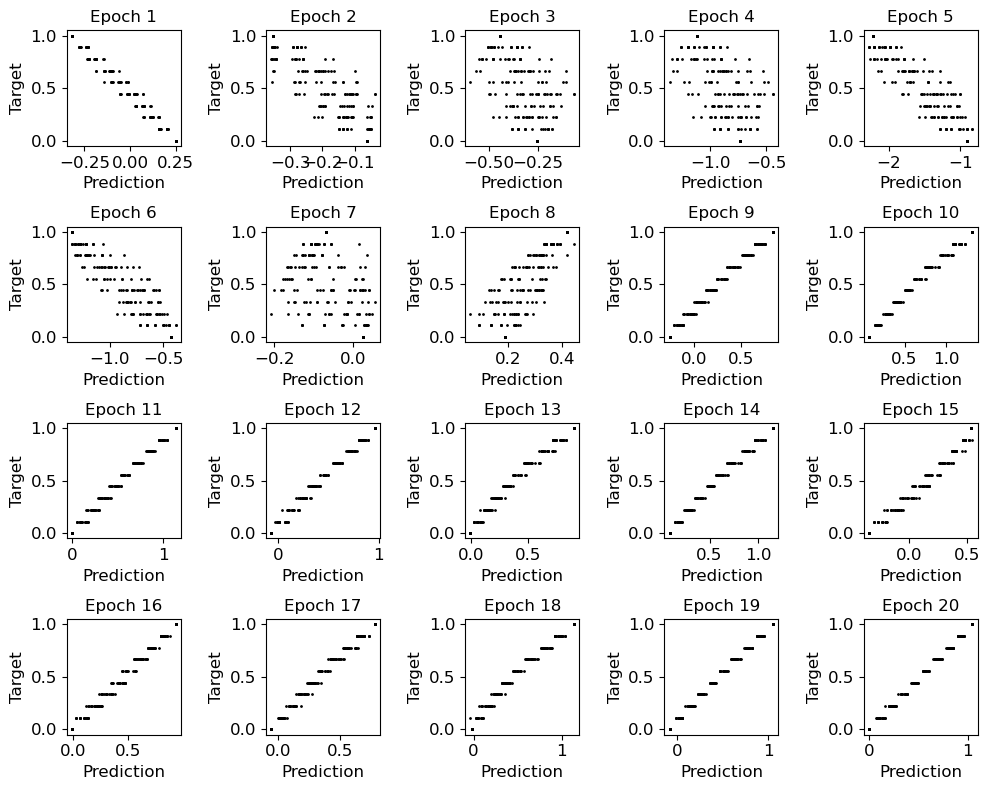

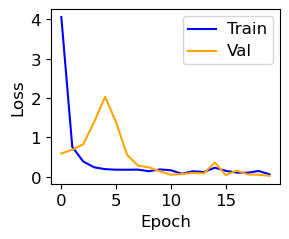

In [5]:
# load results
fig, axs = plt.subplots(4, 5, figsize=(10, 8), tight_layout=True)

train_losses = []
val_losses = []

for cepoch, ax in enumerate(axs.flatten()):
    data = np.load(f'epochs_rgr/epoch_{cepoch}.npy', allow_pickle=True)[0]
    
    targs = data['val_targ']
    preds = data['val_pred']
    
    ax.scatter(preds, targs, c='k', s=1)
    
    set_plot(ax, x_label='Prediction', y_label='Target', title=f'Epoch {cepoch+1}')
    
    train_losses.append(data['train_loss'])
    val_losses.append(data['val_loss'])
    
fig, ax = plt.subplots(1, 1, figsize=(3, 2.5), tight_layout=True)
ax.plot(train_losses, c='b')
ax.plot(val_losses, c='orange')
ax.legend(['Train', 'Val'])
set_plot(ax, x_label='Epoch', y_label='Loss')